# Числен метод за ОДУ от втори ред

## Общ случай

Нека имаме следната задача на Коши

$$
\begin{cases}
y'' = f(x, y, y')\\
y(x_0) = y_0\\
y(x_0) = z_0
\end{cases}
$$

Ще я решим числено със следната схема.

Нека $x\in[x_0, A], \quad x_0<A\in\mathbb{R}$

Дефинираме следнта мрежа: $x_i = x_0 + ih, \quad i = 0,\dots,N-1$, където $N\in\mathbb{N}$ и $h = \dfrac{A-x_0}{N}$

$N$ е броят възли и колкото по-голямо е $N$, толкова по-малко е $h$.

Предполагаме, че $y(x_i) \approx y_i$, тоест, че нашето приближение е приблизително равно на истинската стойност на решението в същата точка (с някаква грешка).

Използваме следната формула за числено диференциране (разлика назад)

$$
\begin{align*}
y'(x_i)
&= \lim \limits_{s\to 0} \dfrac{y(x_i) - y(x_i-s)}{s}\\
&\approx \dfrac{y(x_i) - y(x_i-h)}{h}\\
&= \dfrac{y(x_i) - y(x_{i-1})}{h}
\end{align*}
$$

Така получаваме

$$y'(x_i) = \dfrac{y(x_i) - y(x_{i-1})}{h}$$

Диференцираме по $x_i$

$$y''(x_i) = \dfrac{y'(x_i) - y'(x_{i-1})}{h}$$

$y'(x_i)$ и $y'(x_{i-1})$ приближаваме с числено диференциране с разлика напред

$$
\begin{align*}
y''(x_i)
&= \dfrac{\lim \limits_{s\to 0} \dfrac{y(x_i+s) - y(x_i)}{s} - \lim \limits_{s\to 0} \dfrac{y(x_{i-1}+s) - y(x_{i-1})}{s}}{h}\\
&\approx \dfrac{\dfrac{y(x_i+h) - y(x_i)}{h} - \dfrac{y(x_{i-1}+h) - y(x_{i-1})}{h}}{h}\\
&= \dfrac{y(x_i+h) - y(x_i) - y(x_{i-1}+h) + y(x_{i-1})}{h^2}\\
&= \dfrac{y(x_i+h) - y(x_{i}) - y(x_{i}) + y(x_{i-1})}{h^2}\\
&= \dfrac{y(x_{i+1}) - 2 y(x_{i}) + y(x_{i-1})}{h^2}\\
&\approx \dfrac{y_{i+1} - 2 y_{i} + y_{i-1}}{h^2}\\
\end{align*}
$$

Така

$$y''(x_i) \approx \dfrac{y_{i+1} - 2 y_{i} + y_{i-1}}{h^2} = f(x_i, y_i, y'_i)$$

Откъдето

$$y_{i+1} = 2y_i - y_{i-1} + h^2f(x_i, y_i, y'_i)$$

$$y_{i+1} = 2y_i - y_{i-1} + h^2f\left(x_i, y_i, \dfrac{y_i - y_{i-1}}{h}\right)$$

Също имам начални условия

$$y_0 = y_0$$

$$\dfrac{y_1 - y_{0}}{h} = z_0$$

$$y_1 = hz_0 + y_0$$

Окончателно численото приближение, което решава задачата се задава със следната диференчна схема:

$$y_0 = y_0$$

$$y_1 = hz_0 + y_0$$

$$y_{i+1} = 2y_i - y_{i-1} + h^2f\left(x_i, y_i, \dfrac{y_i - y_{i-1}}{h}\right) \quad i=1,\dots,N-2$$

## Задача

Дадена е задачата на Коши

$$
\begin{cases}
y''(x) = x^2 - xyy' + y'\\
y(0) = 1\\
y'(0) = 2
\end{cases}
$$

Да се намери приближение на решението с числен метод за ОДУ от втори ред в интервала $x\in [0, 5]$ със стъпки $h = 0.1$, $h = 0.02$ и $h = 0.001$. Да се начертаят графиките на трите приближенията в една и съща координатна система.

In [2]:
warning('off','all');
% pkg install -forge symbolic
pkg load symbolic;
graphics_toolkit("gnuplot");

In [88]:
function [nodes, values] = numerical_method(f, x_0, A, y_0, z_0, h)
    N = round((A - x_0)/h);

    nodes = x_0 + h * (0:N-1);

    values = zeros(1, N);

    values(1) = y_0;
    values(2) = h*z_0 + y_0;

    for i = 2:N-1
        values(i+1) = 2*values(i) - values(i-1) + h^2 * f(nodes(i), values(i), (values(i) - values(i-1)) / h);
    end
end

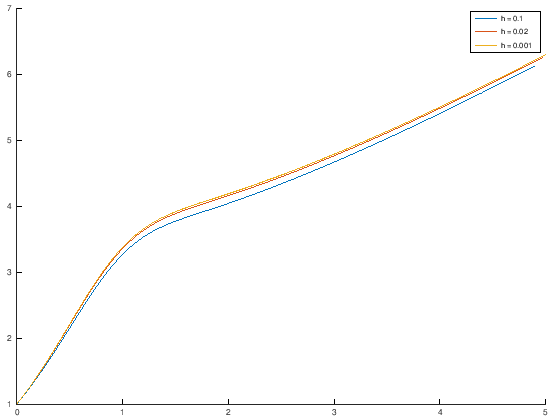

In [89]:
f = @(x, y, y_prim) x^2 - x*y*y_prim + y_prim;
x_0 = 0;
A = 5;
y_0 = 1;
z_0 = 2;

hold on

for h = [0.1, 0.02, 0.001]
    [nodes, values] = numerical_method(f, x_0, A, y_0, z_0, h);
    plot(nodes, values)
end

legend("h = 0.1", "h = 0.02", "h = 0.001")